In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('train-2.csv')
test = pd.read_csv('test-3.csv')

In [3]:
print(f"There are {train.shape[0]} rows and {train.shape[1]} columns")
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns")

There are 31390 rows and 5 columns
There are 2413 rows and 4 columns


In [4]:
train.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [5]:
test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [6]:
train.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
train.isnull().sum()

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

<AxesSubplot:ylabel='Density'>

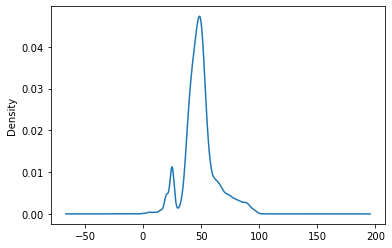

In [9]:
train.tm.plot(kind='density')

In [10]:
print(f"Maximum value of target {train.tm.max()}")
print(f"Minimum value of target {train.tm.min()}")
print(f"Median value of target {train.tm.median()}")

Maximum value of target 130.0
Minimum value of target -1.0
Median value of target 48.0


In [11]:
print(f"Maximum value of pH {train.pH.max()}")
print(f"Minimum value of pH {train.pH.min()}")
print(f"Median value of pH {train.pH.median()}")

Maximum value of pH 64.9
Minimum value of pH 1.99
Median value of pH 7.0


In [12]:
train.pH = train.pH.fillna(train.pH.mean())

In [13]:
train.isnull().sum()

seq_id                 0
protein_sequence       0
pH                     0
data_source         3347
tm                     0
dtype: int64

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yashwadgave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
train.shape[0]

31390

In [16]:
corpus = []
for i in range(31390):
    clean = re.sub('[^a-zA-Z]',' ',train['protein_sequence'][i])
    clean = clean.lower()
    clean = clean.split()
    clean = [ps.stem(word) for word in clean if not word in stopwords.words('english')]
    clean = ' '.join(clean)
    corpus.append(clean)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3), max_features=5000)
X = cv.fit_transform(corpus).toarray()
y = train[['tm']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(X,y)

LinearRegression()

In [21]:
model.predict(X_test)

array([[49.7475418],
       [49.7475418],
       [45.6      ],
       ...,
       [49.7475418],
       [49.7475418],
       [49.7475418]])

In [22]:
test = test.drop(['pH','data_source'],1)

In [23]:
test = cv.transform(test.protein_sequence.values.tolist())

In [24]:
y_pred = model.predict(test)

In [25]:
y_pred

array([[49.7475418],
       [49.7475418],
       [49.7475418],
       ...,
       [49.7475418],
       [49.7475418],
       [49.7475418]])